In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.cluster.hierarchy import linkage, dendrogram

In [10]:
df = pd.read_csv('clustering_data.csv', index_col=0)
df

기업형태 창업자 학력  창업횟수  창업인원  창업교육 경험 사업장 입지      매출액      영업이익  금융비용(이자비용)  \
0       법인   중졸이하     1     1        0   일반주택   265000   15100.0       900.0   
2       법인   중졸이하     2     2        0   일반상업   677000   63045.0     29020.0   
3       법인   중졸이하     1     1        0   일반주택  3936000  264000.0     34300.0   
4       법인   중졸이하     1     1        0   일반주택  5668000  170900.0     18300.0   
5       법인   중졸이하     1     1        0   산업단지    85000    2100.0      1200.0   
...    ...    ...   ...   ...      ...    ...      ...       ...         ...   
31974   법인     대졸     1     3        0   일반주택   524000  152900.0         0.0   
31975   법인     대졸     1     1        0   일반상업   782300   31200.0         0.0   
31976   개인     대졸     1     1        0     기타   526000  191900.0         0.0   
31977   개인     대졸     1     1        0   일반주택   620000  201500.0       400.0   
31978   개인     고졸     1     6        0     기타   803300   93600.0         0.0   

          당기순이익  B2C 소비자 매출(%)  B2G 정부 매출(%)  연간 자금 사용금액  전체 인력  자산대비 자금사용비율  \
0        4750.0            100             0    101850.0      1    55.218459   
2       46147.0            100             0    136948.0      4   970.206210   
3      139300.0              0             0    288880.0     17    32.130989   
4      144850.0            100             0    572130.0     26    15.765648   
5        2050.0            100             0    110900.0      2  1896.979261   
...         ...            ...           ...         ...    ...          ...   
31974  110300.0              0             0    882000.0      6    15.873016   
31975   22500.0              0             0    380000.0      9    23.947368   
31976  138500.0            100             0     16000.0      7   481.250000   
31977  145400.0             70             0   1162800.0     15    12.039904   
31978   22500.0            100             0     80000.0      2   778.750000   

                    창업이전      창업이후  cluster  
0               창업이전자기자금  창업이후자기자금        2  
2               창업이전자기자금  창업이후자기자금        2  
3               창업이전자기자금  창업이후자기자금        0  
4               창업이전자기자금  창업이후자기자금        2  
5               창업이전자기자금  창업이후자기자금        2  
...                  ...       ...      ...  
31974           창업이전자기자금  창업이후자기자금        0  
31975           창업이전자기자금  창업이후자기자금        0  
31976           창업이전자기자금  창업이후자기자금        2  
31977           창업이전자기자금  창업이후자기자금        2  
31978  창업이전자기자금창업이전개인간차용  창업이후자기자금        2  

[21027 rows x 18 columns]

In [11]:
df.columns

Index(['기업형태', '창업자 학력', '창업횟수', '창업인원', '창업교육 경험', '사업장 입지', '매출액', '영업이익',
       '금융비용(이자비용)', '당기순이익', 'B2C 소비자 매출(%)', 'B2G 정부 매출(%)', '연간 자금 사용금액',
       '전체 인력', '자산대비 자금사용비율', '창업이전', '창업이후', 'cluster'],
      dtype='object')

In [12]:
# 한글 및 부호 깨짐 방지
plt.rcParams['font.family'] = 'AppleGothic' #한글
mpl.rcParams['axes.unicode_minus'] = False #마이너스 부호

In [14]:
# 원핫인코딩
oed_df = pd.get_dummies(data = df, columns = ['기업형태', '창업자 학력', '창업횟수', '창업인원', '사업장 입지', 
                                              '전체 인력', '창업이전', '창업이후'], drop_first=True, dtype=int)

In [18]:
df.columns

Index(['기업형태', '창업자 학력', '창업횟수', '창업인원', '창업교육 경험', '사업장 입지', '매출액', '영업이익',
       '금융비용(이자비용)', '당기순이익', 'B2C 소비자 매출(%)', 'B2G 정부 매출(%)', '연간 자금 사용금액',
       '전체 인력', '자산대비 자금사용비율', '창업이전', '창업이후', 'cluster'],
      dtype='object')

In [28]:
new_df = df[['매출액', '영업이익', '금융비용(이자비용)', '당기순이익', 'B2C 소비자 매출(%)', 'B2G 정부 매출(%)', '연간 자금 사용금액', '자산대비 자금사용비율']]
new_df

매출액      영업이익  금융비용(이자비용)     당기순이익  B2C 소비자 매출(%)  B2G 정부 매출(%)  \
0       265000   15100.0       900.0    4750.0            100             0   
2       677000   63045.0     29020.0   46147.0            100             0   
3      3936000  264000.0     34300.0  139300.0              0             0   
4      5668000  170900.0     18300.0  144850.0            100             0   
5        85000    2100.0      1200.0    2050.0            100             0   
...        ...       ...         ...       ...            ...           ...   
31974   524000  152900.0         0.0  110300.0              0             0   
31975   782300   31200.0         0.0   22500.0              0             0   
31976   526000  191900.0         0.0  138500.0            100             0   
31977   620000  201500.0       400.0  145400.0             70             0   
31978   803300   93600.0         0.0   22500.0            100             0   

       연간 자금 사용금액  자산대비 자금사용비율  
0        101850.0    55.218459  
2        136948.0   970.206210  
3        288880.0    32.130989  
4        572130.0    15.765648  
5        110900.0  1896.979261  
...           ...          ...  
31974    882000.0    15.873016  
31975    380000.0    23.947368  
31976     16000.0   481.250000  
31977   1162800.0    12.039904  
31978     80000.0   778.750000  

[21027 rows x 8 columns]

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(new_df)
scaled_df = pd.DataFrame(scaled, columns=['매출액', '영업이익', '금융비용(이자비용)', '당기순이익', 'B2C 소비자 매출(%)', 'B2G 정부 매출(%)', '연간 자금 사용금액', '자산대비 자금사용비율'])
scaled_df

매출액      영업이익  금융비용(이자비용)     당기순이익  B2C 소비자 매출(%)  B2G 정부 매출(%)  \
0     -0.244305 -0.065915   -0.089491 -0.046074       0.851743     -0.224809   
1     -0.145263 -0.016095   -0.000101  0.002108       0.851743     -0.224809   
2      0.638179  0.192720    0.016683  0.110530      -1.256231     -0.224809   
3      1.054541  0.095979   -0.034179  0.116990       0.851743     -0.224809   
4     -0.287576 -0.079424   -0.088537 -0.049217       0.851743     -0.224809   
...         ...       ...         ...       ...            ...           ...   
21022 -0.182043  0.077275   -0.092352  0.076777      -1.256231     -0.224809   
21023 -0.119949 -0.049186   -0.092352 -0.025415      -1.256231     -0.224809   
21024 -0.181562  0.117800   -0.092352  0.109599       0.851743     -0.224809   
21025 -0.158965  0.127776   -0.091081  0.117630       0.219351     -0.224809   
21026 -0.114901  0.015655   -0.092352 -0.025415       0.851743     -0.224809   

       연간 자금 사용금액  자산대비 자금사용비율  
0       -0.189506    -0.078821  
1       -0.181111    -0.068756  
2       -0.144775    -0.079075  
3       -0.077032    -0.079255  
4       -0.187341    -0.058562  
...           ...          ...  
21022   -0.002922    -0.079254  
21023   -0.122982    -0.079165  
21024   -0.210038    -0.074135  
21025    0.064235    -0.079296  
21026   -0.194731    -0.070862  

[21027 rows x 8 columns]

In [35]:
!pip install yellowbrick

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 7.0 MB/s eta 0:00:0000:01


/Users/rynn/anaconda3/lib/python3.11/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Users/rynn/anaconda3/lib/python3.11/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


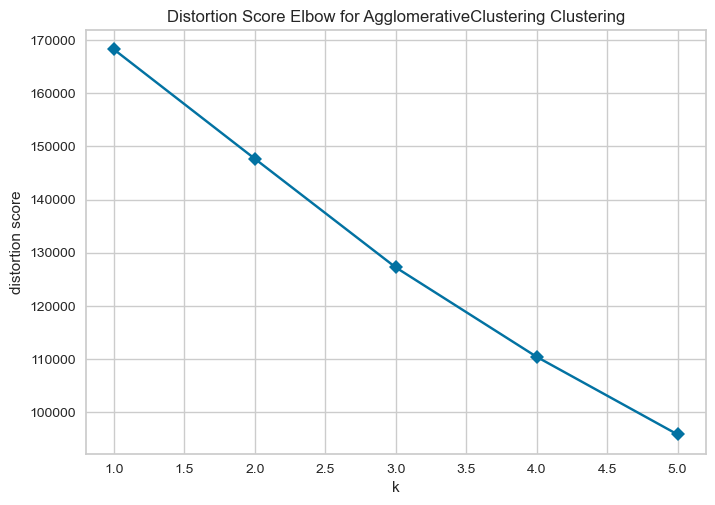

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

k=0
agg = AgglomerativeClustering(n_clusters=k)
visualizer = KElbowVisualizer(agg, k=(1,6), timings=False)
visualizer.fit(scaled_df)
visualizer.show()

In [42]:
from sklearn.metrics import silhouette_score, silhouette_samples

for k in range(2, 6):
    agg = AgglomerativeClustering(n_clusters=k).fit(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, agg.labels_)
    print(f'cluster : {k} // silhouette index {silhouette_avg}')

cluster : 2 // silhouette index 0.5284283586188623
cluster : 3 // silhouette index 0.5289876756194247
cluster : 4 // silhouette index 0.5994227039217965
cluster : 5 // silhouette index 0.6188588506870377


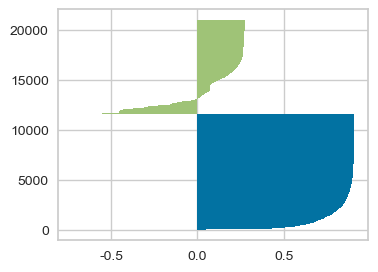

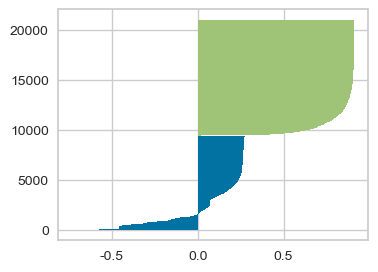

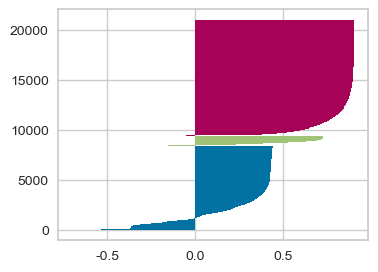

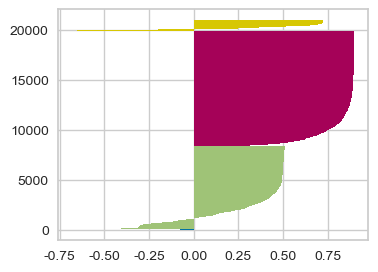

In [44]:
import numpy as np

for k in range(2, 6):
    fig, ax = plt.subplots(1, 1,figsize=(4,3))
    agg = AgglomerativeClustering(n_clusters=k).fit(scaled_df)
    silhouette_vals = silhouette_samples(scaled_df, agg.labels_)
    y_ticks = []
    y_lower = y_upper = 0
    for c_num in np.unique(agg.labels_):
        cluster_silhouette_vals = silhouette_vals[agg.labels_==c_num]
        y_upper += len(cluster_silhouette_vals)
        cluster_silhouette_vals.sort() 
        
        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
        y_lower += len(cluster_silhouette_vals)

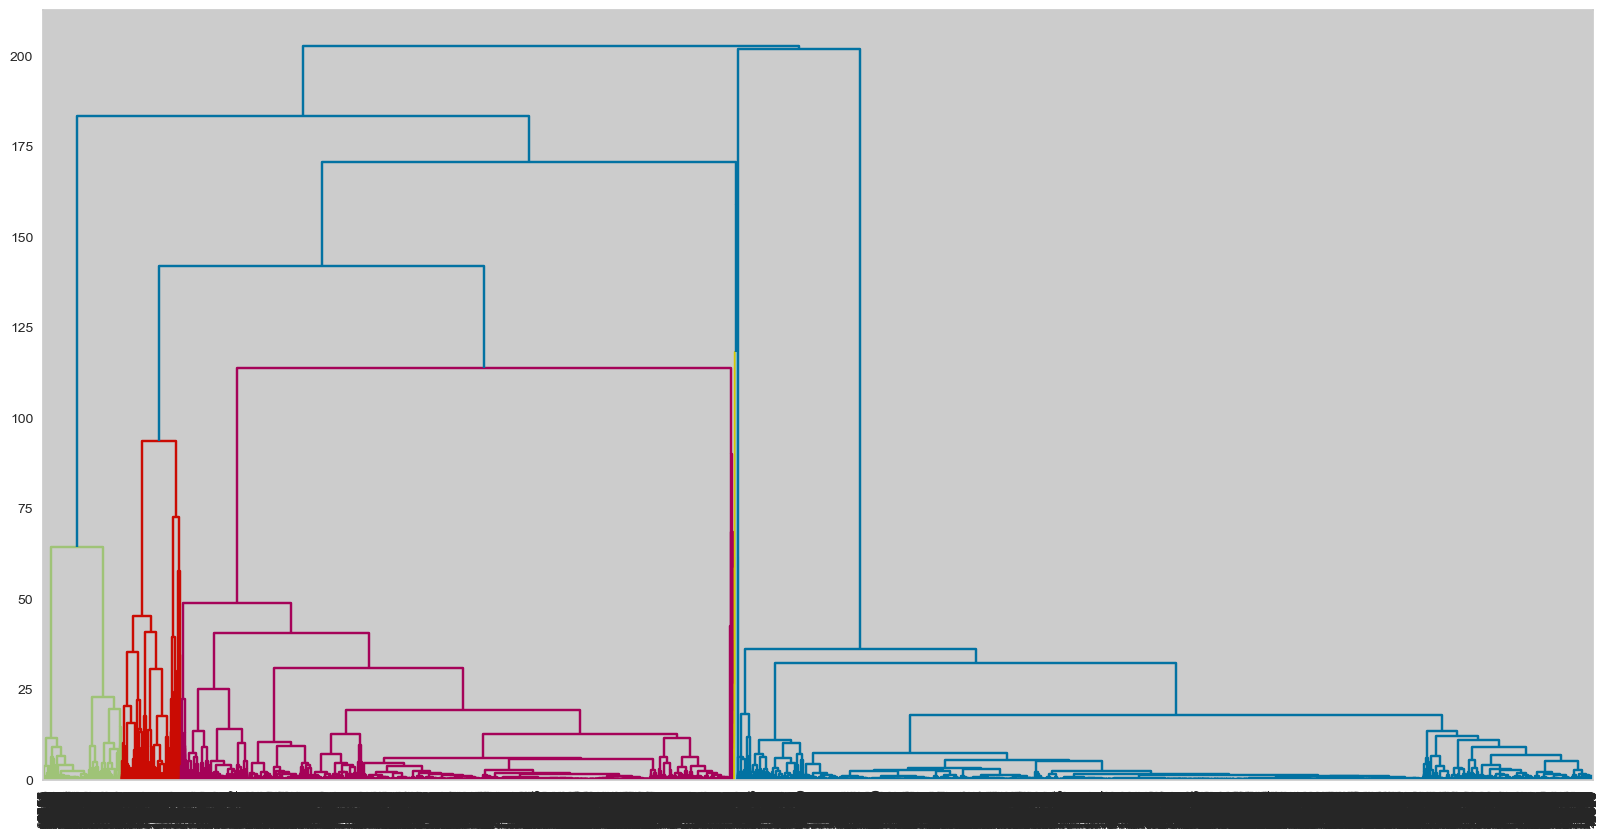

In [37]:
# 군집 방식은 ward로 거리는 유크리디안으로 측정해 최적의 군집 개수 분석
clusters = linkage(scaled_df, method='ward', metric='euclidean')

# 덴드로그램 그리기
plt.figure(figsize=(20, 10))              
dendrogram(clusters,
           #leaf_rotation=50, # 라벨 50% 기울이기
           leaf_font_size=10, # 라벨 폰트 크기
           labels=scaled_df.index) # 라벨에 사용할 변수
plt.show()